In [1]:
import os
from pathlib import Path
import sys

if "__project_dir__" not in globals():
    __project_dir__ = Path.cwd().parents[1].resolve()

sys.path.append(__project_dir__)
os.chdir(__project_dir__)

In [2]:
import numpy as np
from src.model_analyser import ModelAnalyser
from src.model import tcr_metric, tcr_representation_model

/home/yutanagano/Projects/tcr_embedder/.venv/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
mltcrdist = tcr_metric.BetaMlTcrDist()

In [4]:
analyser = ModelAnalyser()
# model = tcr_representation_model.load_blastr_save(Path("/home/yutanagano/UCLOneDrive/MBPhD/projects/tcr_embedder/model_saves/Beta_CDR_BERT_Unsupervised_Large_2"))
# model.distance_bins = np.linspace(0, 0.8, num=21)

In [5]:
model = tcr_metric.BetaCdr3Levenshtein()
# model = mltcrdist

In [6]:
def v_gene_allowed(v_gene: str) -> bool:
    for allowed_v_gene in mltcrdist._V_TO_NUMBER.keys():
        if allowed_v_gene in v_gene:
            return True
    
    return False

analyser._background_data = analyser._background_data[analyser._background_data.TRBV.map(v_gene_allowed)]

for dataset_name, dataset in analyser._labelled_data.items():
    analyser._labelled_data[dataset_name] = dataset[dataset.TRBV.map(v_gene_allowed)]

Running PrecisionRecallAnalysis...


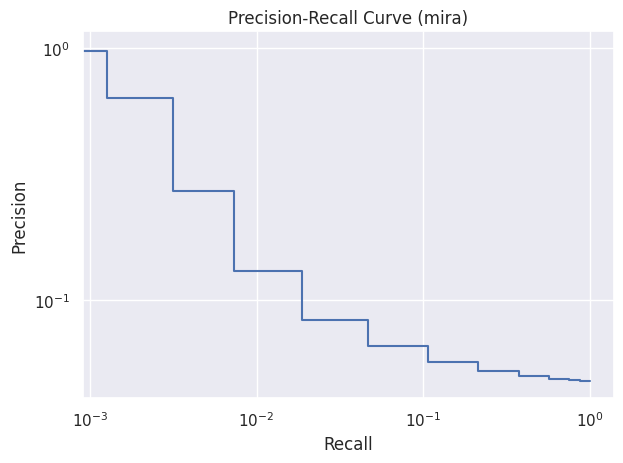

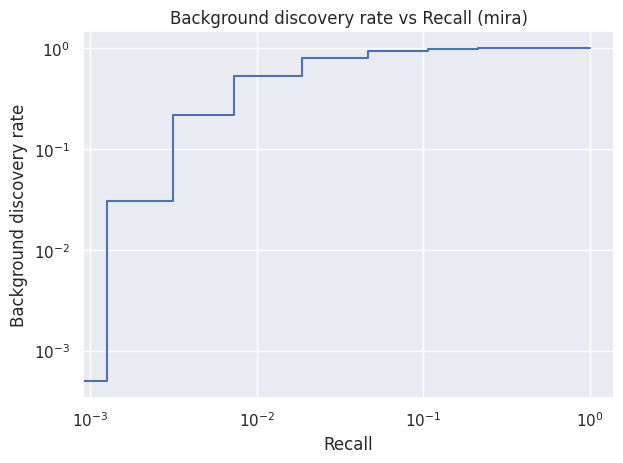

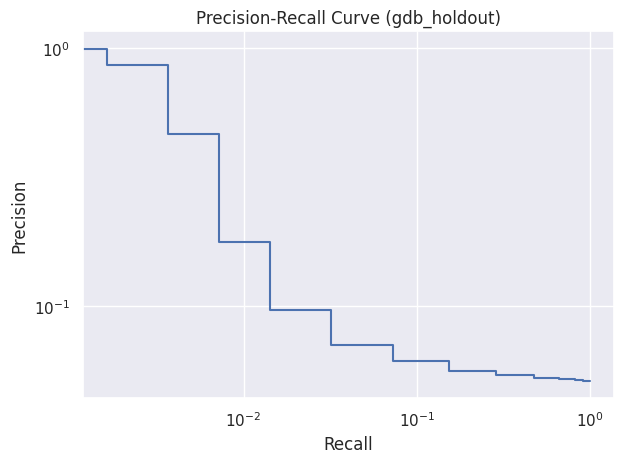

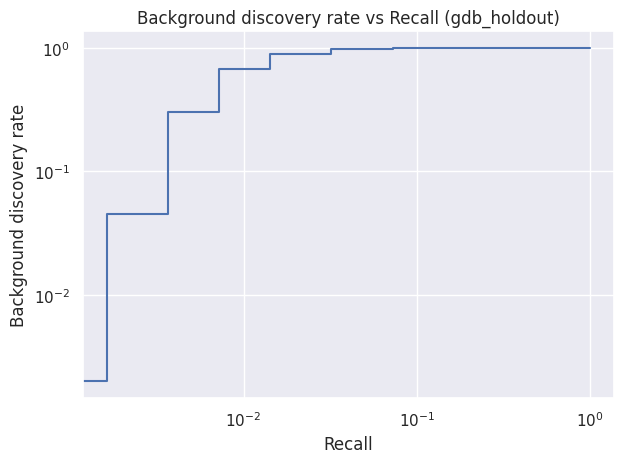

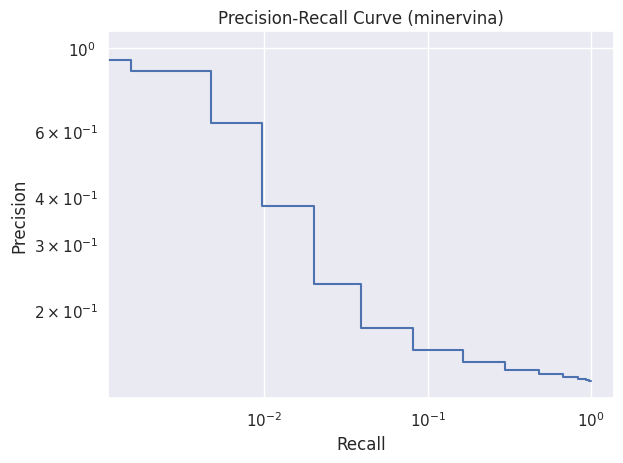

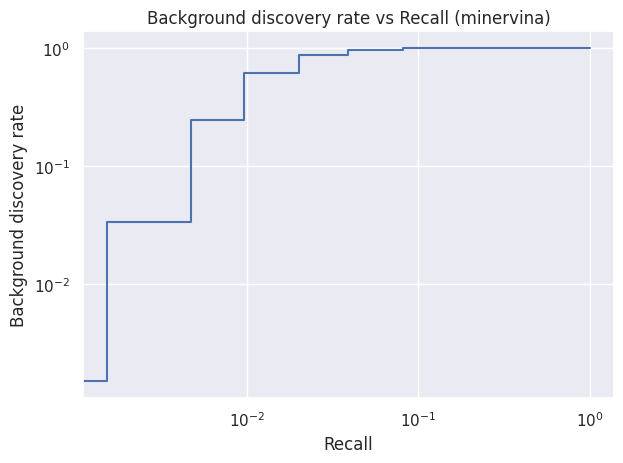

In [7]:
analyser.analyse(model)